# A basic set of tools for visualizing FESOM2.0 simulations

## Setting options

In [12]:
# Plot calving map
#cmap = cmo.ice
import cmocean as cmo

extend='both'

# Load model data
import xarray as xr
from collections import OrderedDict

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from mpl_toolkits.basemap import Basemap

path ='/home/jstreffi/thesis/data/runoff_maps_CORE2.nc'
var = 'arrival_point_id'
hemi = 'SH'
        
# Load model Data
data = OrderedDict()
paths = []

intermediate = []
intermediate = xr.open_mfdataset(path, combine="by_coords", engine="netcdf4", use_cftime=True)
data[var] = intermediate.compute()
data2=data[var]

x = np.asarray(data2.lon).flatten()
y = np.asarray(data2.lat).flatten()

/tmp/ipykernel_182019/1204749063.py:35: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cax = map.pcolormesh(x_map, y_map, data, cmap=cmap, shading='auto')


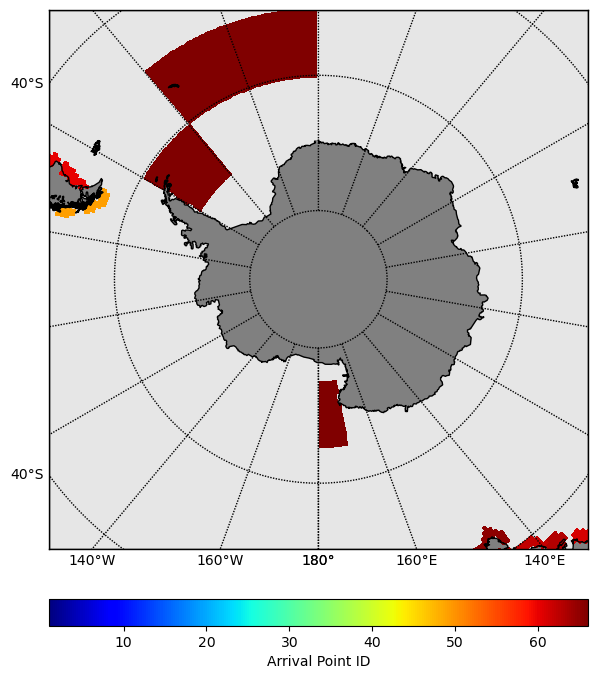

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the dimensions and data variables
lon = x
lat = y
data = data2.arrival_point_id
data = data.where(data != -1, np.nan)
data = data.where(data != -2, np.nan)

# Create the Basemap instance
map = Basemap(projection="splaea", boundinglat=-50, lon_0=180, resolution="l")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Draw coastlines
map.drawcoastlines()

# Draw parallels and meridians
plabels = [1, 0, 0, 0]  # Show only left labels
mlabels = [0, 0, 0, 1]  # Show only bottom labels
map.drawparallels(np.arange(-80.0, 81.0, 20.0), labels=plabels)
map.drawmeridians(np.arange(-180.0, 181.0, 20.0), labels=mlabels)

# Draw map boundary and fill continents
map.drawmapboundary(fill_color="0.9")
map.fillcontinents(color="grey", lake_color=".7")

# Plot the data using pcolormesh
lon_grid, lat_grid = np.meshgrid(lon, lat)
x_map, y_map = map(lon_grid, lat_grid)
cmap = plt.get_cmap('jet')  # Choose a colormap
cax = map.pcolormesh(x_map, y_map, data, cmap=cmap, shading='auto')

# Add a colorbar
cbar = map.colorbar(cax, location='bottom', pad=0.5)
cbar.set_label('Arrival Point ID')

# Show the plot
plt.savefig(hemi+"_calving.png",dpi=300,bbox_inches='tight')

In [36]:
print(type(data))

<class 'xarray.core.dataarray.DataArray'>


In [37]:
data_with_nan = data.where(data != 0, np.nan)

In [38]:
data_with_nan

<xarray.DataArray 'arrival_point_id' (lat: 256, lon: 512)>
array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-2., -2., -2., ..., -2., -2., -2.],
       [-2., -2., -2., ..., -2., -2., -2.],
       [-2., -2., -2., ..., -2., -2., -2.]])
Coordinates:
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46